KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
----------------------------------------
[2 0 2 1 1 1 0 2 1 1 0 0 0 2 0 1 2 2 1 0 1 2 0 2 1 1 2 1 0 0 1 2 2 0 0 1 0
 1 2 0 1 0 2 0 0 1 0 1 1 0 1 0 1 1 0 2 2 1 1 2 0 0 2 1 0 1 2 0 2 0 1 1 1 1
 0 2 0 1 2 2 1 2 0 2 2 2 0 1 2 2 1 0 1 2 0 0 2 0 1 2 0 1 2 0 2 2 1 2 0 0 2
 1 2 2 1 1 2 2 0 0 0 1 0 0 0 1 0 0 0 1 1 1 2 1 1 0 1 2 1 1 0 2 0 2 1 1 2 1
 1 0 2 1 2 0 1 1 0 0 2 0 2 2 0 2 1 2 2 2 2 1 0 2 1 0 0 0 2 0 2 2 0 1 2 2 2
 2 0 1 2 1 2 2 0 0 1 2 0 1 2 1 0 1 2 1 0 1 2 1 2 0 2 2 1 0 0 0 0 2 1 0 2 0
 0 0 2 1 1 2 2 1 2 0 0 2 0 1 1 1 2 2 0 1 1 1 1 0 1 1 2 0 0 2 0 0 1 2 0 1 2
 2 1 2 1 1 2 1 2 0 0 0 0 2 2 2 2 2 1 1 0 2 2 0 0 0 1 0 1 1 0 0 1 1 1 0 2 2
 1 0 2 1]


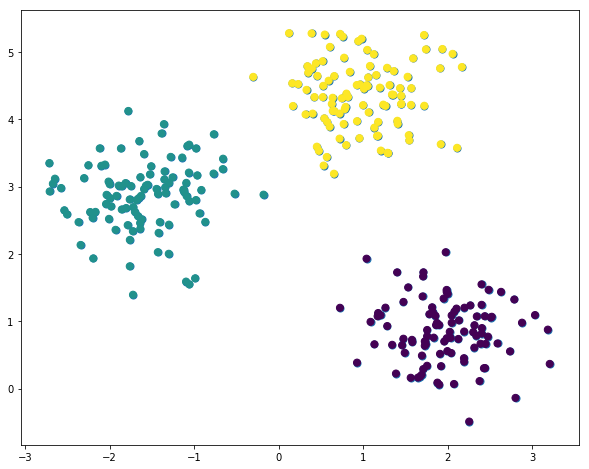

In [20]:
# задача класстеризации метдодом k-means

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.tree import DecisionTreeClassifier

# генерация выборки
X,y_true=make_blobs(n_samples=300, cluster_std=0.5, random_state=0)

plt.scatter(X[:,0], X[:,1],s=50)


# кластеризация на заданное количество кластеров
kmeans = KMeans(n_clusters=3)
print(kmeans)
# заполнение примерами
kmeans.fit(X)
# получение предсказаний для вектора X (метод кластеров)
y_kmeans = kmeans.predict(X)
print('----------------------------------------')
print(y_kmeans)
# изображение точек с пометками на плоскости
plt.scatter(X[:,0], X[:,1],s=50, c=y_kmeans, cmap='viridis')






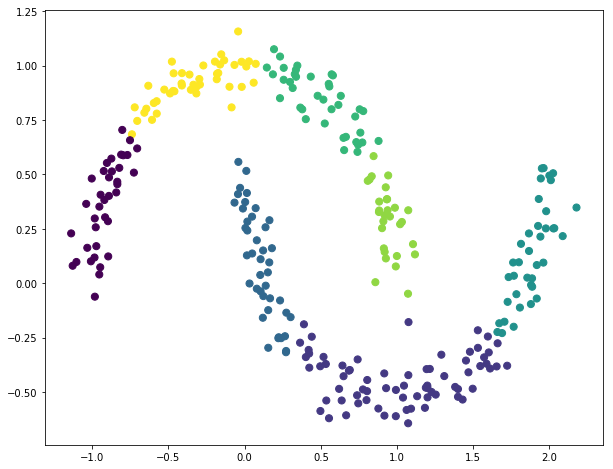

In [7]:
# применение спектральной кластеризации - пример с лунообразными кластерами

X,y = make_moons(300,noise=.07, random_state=0)
#labels = KMeans(2,random_state=0).fit_predict(X)

model = SpectralClustering(n_clusters=7, affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1],s=50, c=labels, cmap='viridis')


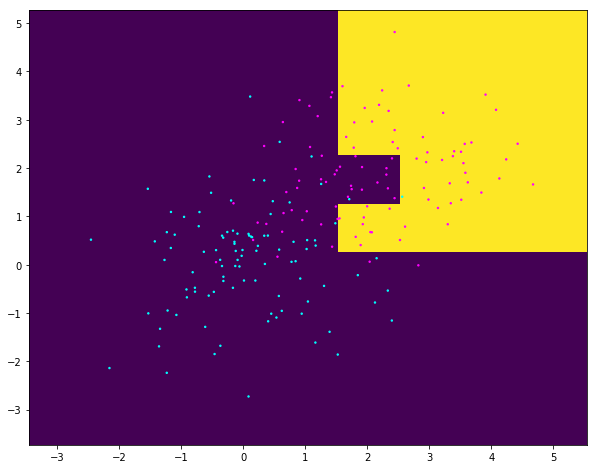

In [20]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.tree import DecisionTreeClassifier
import sys
np.set_printoptions(threshold=sys.maxsize)
# определение размеров изображения
plt.rcParams['figure.figsize']=(10,8)

# генерация тестовой выборки из двух классов
train_data = np.random.normal(size=(100,2))
train_labels=np.zeros(100)
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)]
train_labels=np.r_[train_labels,np.ones(100)]

# функция для генерации мелкой сетки - визуализация дерева решений
def get_grid(data):
    x_min,x_max=data[:,0].min()-1, data[:,0].max()+1
    y_min,y_max=data[:,1].min()-1, data[:,1].max()+1
    return np.meshgrid(np.arange(x_min,x_max),np.arange(y_min,y_max))
# получение массивов координат точек сетки
xx,yy=get_grid(train_data)

# построение дерева решений по обучающей выборке

clf=DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(train_data,train_labels)
# визуализация дерева решений - получение предсказаний для каждого узла сетки
predicted = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
# закраска областей согласно выбранному классу
plt.pcolormesh(xx,yy,predicted, cmap='viridis')

# изображение точек обучающей выборки
plt.scatter(train_data[:,0], train_data[:,1],s=2, c=train_labels, cmap='cool')